# <strong>Statistics (Chapter 11)
1. <strong>정규성 검정</strong> : 금융 모델의 <strong>시계열 수익률 모형</strong>에 대한 정규성 검정
1. <strong>포트폴리오이론</strong> : 투자와 관계된 <strong>주관적/경험적 분산 판단을, 수학적/통계적</strong> 방법으로 대체
1. <strong>주성분 분석</strong> : 수많은 시계열 성분중, <strong>소수의 선형/독립적 (또는 상관성 없는) 성분을 구별</strong>해 복잡도를 줄인다
1. <strong>베이즈 회귀</strong> : 확률의 주관적 척도와 이를 <strong>계속적 갱신

---<strong><통계기초용어 : 데이터 분포적 측면에선 동의어로 볼 수 있다></strong>---
1. 평균 : 데이터 분포의 무게중심을 나타내는 값
1. <a href="http://blog.naver.com/PostView.nhn?blogId=running_p&logNo=90178185477">기댓값</a> : 확률변수에 대해 평균적으로 기대하는 값
1. 샤프지수 : (무위험 단기 이자율에 대한 포트폴리오의 초과 수익률 기댓값) / 포트폴리오 표준편차 기댓값

<br></br>
## <strong>1 정규성 검정
<strong>주식 수익률의 정규성 가정</strong>은, <strong>통계적 시각적 검정</strong>시 핵심적으로 이루어지는 작업이다
1. <strong>포트폴리오 이론</strong> : <strong>주식수익률은 정규분포를 구성</strong>하므로, 평균수익/ 수익의분산/ 주신사이의 공분산을 고려하여 투자를 결정
1. <strong>효율적 시장 가설</strong> : 모든 정보는 시장참여자에게 공유가 되고, <strong>수익률은 정규분포로 수렴</strong>한다
1. <strong>옵션 가격결정 모형</strong> : <strong>브라운 운동모형</strong>에 따른 정규분포 수익률을 형성한다
1. <strong>자본자산 가격결정 모형</strong> : <strong>수익률이 정규분포를 구성하면, 개별 주식의 가격과 전체 지수의 관계를 Beta 값</strong>으로 측정가능

### <strong>01 _Log 변환 데이터의_ 히스토그램, <a href="https://datascienceschool.net/view-notebook/4d74d1b5651245a7903583f30ae44608/">확률밀도함수</a>, <a href ="https://datascienceschool.net/view-notebook/76acc92d28354e86940001f9fe85c50f/">Q-Q Plot 검정</a>
기하 브라운 모델의 <strong>몬테카를로 시뮬레이션 운동경로를 Visualization을 활용하여 Log</strong> 분석
1. <strong>로그 정규분포 값 :</strong> 임의의 시간 t > 0 에서 $S_t$의 값은 <strong>'로그 정규분포'</strong>를 이룬다
1. <strong>로그 정규분포 수익률 :</strong> <strong>시간 s 와 t (0< s< t) 사이</strong>의, <strong>로그 수익률</strong> $log (\frac{S_t}{S_s}) = log S_t - log S_s$은 정규분포를 이룬다

In [1]:
# 기하 브라운 운동모형에 대한 '몬테카를로 경로'를 생성
# < Parameter >
# S0    : 초기 가격 (float)
# r     : 고정 단기 이자율 (float)
# sigma : 고정 변동성 (float)
# T     : 만기 기간(Year) (float)
# M     : 만기 기간을 분석을 위해 분할 한 구간 수 (int)
# I     : 생성한 경로의 수 (int)
# < Returns >
# paths : 주어진 인수값 (ndarray, shape (M + 1, I))

In [2]:
%matplotlib inline
import matplotlib
matplotlib.rc('font', family='NanumGothic')
import matplotlib.pyplot as plt

import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm

/home/markbaum/Python/django/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(51, 250000)


array([ 100.    ,   97.821 ,   98.5573,  106.1546,  105.899 ,   99.8363,
        100.0145,  102.6589,  105.6643,  107.1107,  108.7943,  108.2449,
        106.4105,  101.0575,  102.0197,  102.6052,  109.6419,  109.5725,
        112.9766,  113.0225,  112.5476,  114.5585,  109.942 ,  112.6271,
        112.7502,  116.3453,  115.0443,  113.9586,  115.8831,  117.3705,
        117.9185,  110.5539,  109.9687,  104.9957,  108.0679,  105.7822,
        105.1585,  104.3304,  108.4387,  105.5963,  108.866 ,  108.3284,
        107.0077,  106.0034,  104.3964,  101.0637,   98.3776,   97.135 ,
         95.4254,   96.4271,   96.3386])

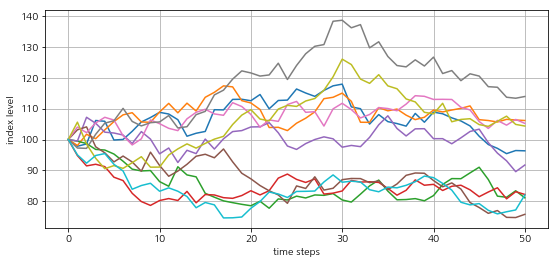

In [3]:
# 브라운 운동 모형에 의한 '몬테카를로 경로'를 생성
def gen_paths(S0, r, sigma, T, M, I): 
    dt    = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                  sigma * np.sqrt(dt) * rand)
    return paths  # 몬테카를로 시뮬레이션 경로 ndarray 출력

S0, r,  sigma = 100., 0.05, 0.2
T,  M,  I     = 1.0 ,   50, 250000  # 1.0 년의 시간 구간을 1) 50구간으로 분할 2) 250,000회 시뮬레이션 
paths = gen_paths(S0, r, sigma, T, M, I); print(paths.shape)

plt.figure(figsize=(9,4))
plt.plot(paths[:, ::25000])         # 50개 구간을 분석한 25만 개 전체 중 10개(2만5천번의 간격) 기하 브라운 운동 시뮬레이션 경로를 시각화
plt.grid(True); plt.xlabel('time steps'); plt.ylabel('index level')
paths[:, 0].round(4)                # 브라운 운동모형 시뮬레이션

In [4]:
def print_statistics(array):    # 통계적 분석결과를 테이블로 출력
    sta = scs.describe(array)   # scs.describe() 결과를 보기좋게 재정렬
    print("%14s %15s" % ('statistic', 'value'),'\n', 30 * "-")
    print("%14s %15.5f" % ('크기(size)',     sta[0]))
    print("%14s %15.5f" % ('최소(min)',      sta[1][0]))
    print("%14s %15.5f" % ('최대(max)',      sta[1][1]))
    print("%14s %15.5f" % ('평균(mean)',     sta[2]))
    print("%14s %15.5f" % ('표준편차(std)',   np.sqrt(sta[3])))
    print("%14s %15.5f" % ('왜도(skew)',     sta[4]))
    print("%14s %15.5f" % ('첨도(kurtosis)', sta[5]))

log_returns = np.log(paths[1:] / paths[0:-1])   # 수익률 분포 Log로 변환
print('log_returns.shape : {} \nby .flatten() : {}\n'.format(
       log_returns.shape, 
       log_returns.flatten().shape))            # log변환 후, .flatten()로 1차원 ndarray로 변환
print(print_statistics(log_returns.flatten())) 
# 결과 : 12만개 데이터가 모두 +-0.15 사이에 분포함을 알 수 있다
# 이를 평균수익률과 표준편차를 연율화 하면 0.05, 0.2로 예측 가능하다

log_returns.shape : (50, 250000) 
by .flatten() : (12500000,)

     statistic           value 
 ------------------------------
      크기(size)  12500000.00000
       최소(min)        -0.15664
       최대(max)         0.15371
      평균(mean)         0.00060
     표준편차(std)         0.02828
      왜도(skew)         0.00055
  첨도(kurtosis)         0.00085
None


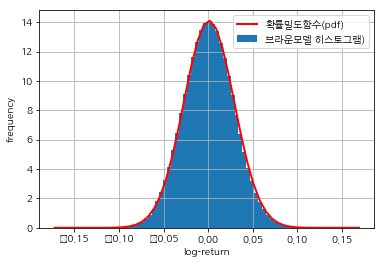

In [5]:
# <정규성 측정 1>
# 1. 브라운모델 히스토그램 : 12,500,000 개의 자료가 +/- 0.15 사이에 분포
plt.hist(log_returns.flatten(), bins=70, normed=True, label='브라운모델 히스토그램)')  
plt.grid(True); plt.xlabel('log-return'); plt.ylabel('frequency')
# 2. 확률밀도함수 : scs.norm.pdf() (1.의 결과와일치)
# 연속확률분포 : 구간별 "분포확률"을 계산
# 누적확률분포 : 초기시점을 고정 후 뒷 종료시점을 변화화며 분포값을 계산
# 확률밀도함수 : 구간을 미분으로 나누어, "구간별 확률"을 계산
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r/M, scale=sigma/np.sqrt(M)),'r' , lw=2.0, label='확률밀도함수(pdf)'); plt.legend()
# 결과 : 이론적인 확률밀도와 히스토그램을 비교하여 정규성을 증명한다

Text(0,0.5,'sample quantiles')

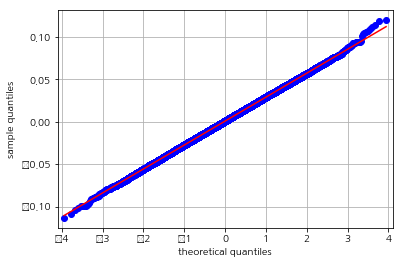

In [6]:
# <정규성 측정 2>
# 3. Q-Q plot : 샘플값의 샘플 분위수와, 정규분포상의 이론적 분위수를 비교한다
# 확률분포를 동일한 확률로 쪼갠 그래프로써 정규분포를 갖는 경우에는 직선에 가깝게 그려진다
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.grid(True); plt.xlabel('theoretical quantiles'); plt.ylabel('sample quantiles')

### <strong>02 통계적 검정
(<strong>Log 데이터</strong>를 활용한) 통계적 검정  : 시각적 검정 절차를 체계적으로 수행

Log변환 데이터의 통계적 검정 :
Skew of data set           0.001
Skew test p-value          0.430
Kurt of data set           0.001
Kurt test p-value          0.541
Norm test p-value          0.607


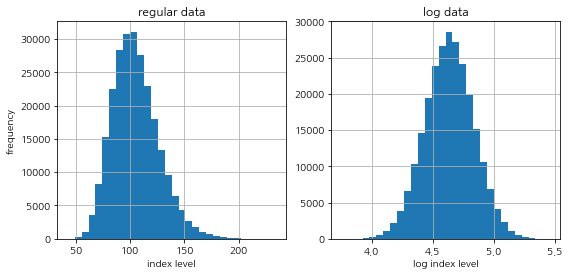

In [7]:
def normality_tests(arr):
    print("Skew of data set  %14.3f" % scs.skew(arr))          # 왜도검정(skew-test):왜도의 정규분포와 일치를 검정한다
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set  %14.3f" % scs.kurtosis(arr))      # 첨도검정(kurto-test):첨도의 정규분포와 일치를 검정한다
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(arr)[1]) # 정규성 검정(normal-test):두 검정방법을 조합한다
    
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.hist(paths[-1], bins=30)             # 시뮬레이션 만기의 값 히스토그램 (브라운 모델)
ax1.grid(True); ax1.set_xlabel('index level'); ax1.set_ylabel('frequency'); ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)     # 시뮬레이션 만기의 값 히스토그램 (Log 변환 모델)
ax2.grid(True); ax2.set_xlabel('log index level'); ax2.set_title('log data')

print('Log변환 데이터의 통계적 검정 :'); normality_tests(log_returns.flatten())
# 검정결과 : p-value(유의 확률) 0.05 이상이므로, Log 수익률 분석방법이 정규분포임을 알 수 있다

In [8]:
print('브라운 모델 통계적 검정 :');    print_statistics(paths[-1])
print('\nLog 변환 후 통계적 검정 :'); print_statistics(np.log(paths[-1]))
# 로그 변환 검정결과, 외도/ 첨도 모두 0으로 수렴 : 정규성이 더 강하다
# 높은 유의 확률값을 통해 정규분포 가설의 검증이 가능하다

브라운 모델 통계적 검정 :
     statistic           value 
 ------------------------------
      크기(size)    250000.00000
       최소(min)        42.74870
       최대(max)       233.58435
      평균(mean)       105.12645
     표준편차(std)        21.23174
      왜도(skew)         0.61116
  첨도(kurtosis)         0.65182

Log 변환 후 통계적 검정 :
     statistic           value 
 ------------------------------
      크기(size)    250000.00000
       최소(min)         3.75534
       최대(max)         5.45354
      평균(mean)         4.63517
     표준편차(std)         0.19998
      왜도(skew)        -0.00092
  첨도(kurtosis)        -0.00327


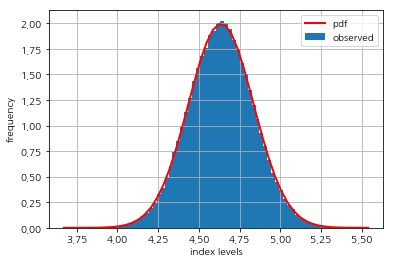

In [9]:
# 로그 변환값의 히스토그램과 정규분호 확률밀도함수를 비교
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, normed=True, label='observed') # 히스토그램
plt.grid(True); plt.xlabel('index levels'); plt.ylabel('frequency')

x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()), 'r', lw=2.0, label='pdf'); plt.legend() # 확률밀도함수

Text(0,0.5,'sample quantiles')

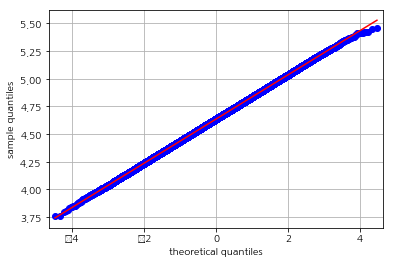

In [10]:
# Quantile-quantile plot for log index levels
sm.qqplot(log_data, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
# 1번 : '브라운모델'의 기댓값 수익률 계산 후 log 변환  log_returns = np.log(paths[1:] / paths[0:-1])
# 2번 : '브라운모델'의 기댓값 log 변환              log_data    = np.log(paths[-1])
# (구부러진 방향이 다를 뿐 분포자체의 성격은 동일하다)

### <strong>03 주식자료 분석
시계열 데이터 분석

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-11-18 to 2018-01-08
Data columns (total 4 columns):
^GDAXI    1762 non-null float64
GM        1762 non-null float64
INTC      1762 non-null float64
MSFT      1762 non-null float64
dtypes: float64(4)
memory usage: 68.8 KB

                  ^GDAXI         GM       INTC       MSFT
Date                                                    
2010-11-18  6832.109863  34.189999  21.020000  25.840000
2010-11-19  6843.549805  34.259998  21.139999  25.690001 None


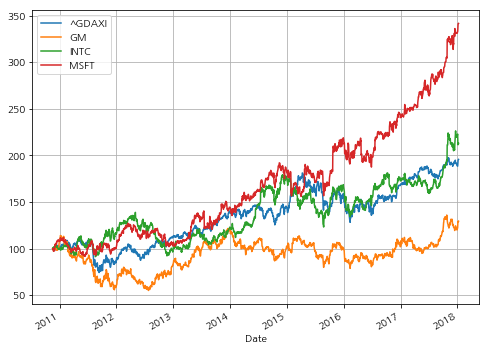

In [11]:
# 주가 데이터 불러오기
import pandas as pd
from pandas_datareader import get_data_yahoo

symbols = ['^GDAXI', 'GM','INTC', 'MSFT']
# data = pd.DataFrame()
# for sym in symbols:
#     try: data[sym] = get_data_yahoo(sym, '2010-01-01')['Close']
#     except: pass
# data = data.dropna()
data = pd.read_csv('./data/stocks.csv')
data = data.set_index('Date')           # index 로 활용할 컬럼을 지정
data.index = pd.to_datetime(data.index) # index 를 Datetime 포맷으로 변환
print('\n', data.head(2), data.info())

# 시간에 따른 수식과 지수의 변화
(data / data.iloc[0] * 100).plot(figsize=(8, 6), grid=True)

              ^GDAXI        GM      INTC      MSFT
Date                                              
2010-11-18       NaN       NaN       NaN       NaN
2010-11-19  0.001673  0.002045  0.005693 -0.005822


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2de52c400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb2dcc6b978>]], dtype=object)

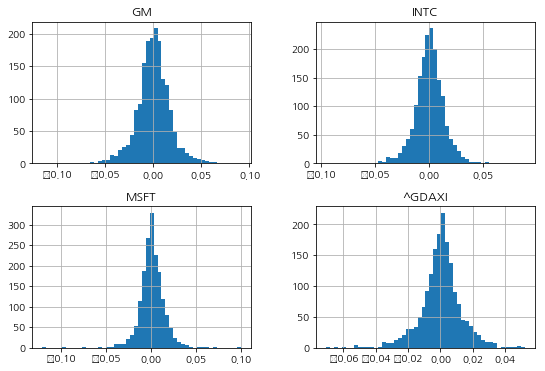

In [12]:
# Log 수익률 분석
# 수익률은 Numpy 보다, Pandas의 .shift(1)(데이터 index를 1개씩 미룸)가 더 편리하다
log_returns = np.log(data / data.shift(1))  
print(log_returns.head(2))

# 개별 종목들의 Log 수익률 분포를 히스토그램으로 변환
log_returns.hist(bins=50, figsize=(9, 6))

In [13]:
# 개별 종목에 대한 시계열 데이터의 통계치를 연산
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol ^GDAXI
------------------------------
     statistic           value 
 ------------------------------
      크기(size)      1761.00000
       최소(min)        -0.07067
       최대(max)         0.05210
      평균(mean)         0.00038
     표준편차(std)         0.01273
      왜도(skew)        -0.34051
  첨도(kurtosis)         2.84947

Results for symbol GM
------------------------------
     statistic           value 
 ------------------------------
      크기(size)      1761.00000
       최소(min)        -0.11544
       최대(max)         0.09108
      평균(mean)         0.00015
     표준편차(std)         0.01791
      왜도(skew)        -0.11702
  첨도(kurtosis)         3.33063

Results for symbol INTC
------------------------------
     statistic           value 
 ------------------------------
      크기(size)      1761.00000
       최소(min)        -0.09543
       최대(max)         0.08867
      평균(mean)         0.00043
     표준편차(std)         0.01424
      왜도(skew)         0.02844
  첨도(kurtosis)      

Text(0,0.5,'sample quantiles')

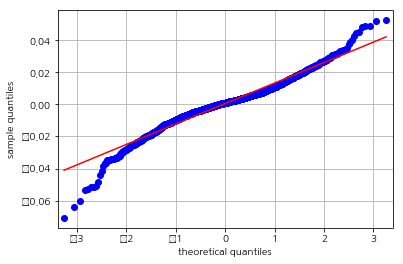

In [14]:
# DAX 지수 로그 수익률을 Q-Q plot 으로 시각화
sm.qqplot(log_returns['^GDAXI'].dropna(), line='s')
plt.grid(True); plt.xlabel('theoretical quantiles'); plt.ylabel('sample quantiles')
# 양쪽의 outlier는 정규분포보다 양수/ 음수인 경우를 반영한 결과로써, 시계열 데이터는 Fat tail 현상을 나타난다

Text(0,0.5,'sample quantiles')

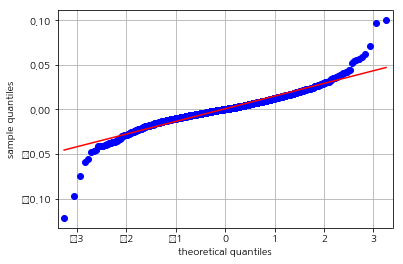

In [15]:
# Quantile-quantile plot for Microsoft log returns (MSFT 주식의 로그 수익률 Q-Q plot)
sm.qqplot(log_returns['MSFT'].dropna(), line='s')
plt.grid(True); plt.xlabel('theoretical quantiles'); plt.ylabel('sample quantiles')

In [16]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(32 * "-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)
# <종목별 통계적 해석결과>
# 유의확률이 모두 0으로써, 정규분포 가정을 강력하게 기각한다
# 따라서 주가분석은 '정규분포'모델은 기각될 수 밖에 없고, Fat tail을 적용가능한 확장 모형을 필요로 한다


Results for symbol ^GDAXI
--------------------------------
Skew of data set          -0.341
Skew test p-value          0.000
Kurt of data set           2.849
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol GM
--------------------------------
Skew of data set          -0.117
Skew test p-value          0.045
Kurt of data set           3.331
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol INTC
--------------------------------
Skew of data set           0.028
Skew test p-value          0.625
Kurt of data set           4.121
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT
--------------------------------
Skew of data set          -0.126
Skew test p-value          0.030
Kurt of data set           8.428
Kurt test p-value          0.000
Norm test p-value          0.000


<br></br>
## <strong>2 포트폴리오 최적화
Portfolio Optimization

1. 기말 자산가치의 분포의 설명을 위해서는, <strong>평균, 분산</strong> 이외의 어떠한 통계치도 필요없다
1. 만약 투자자가 <strong>'이차원 아닌 특별한 형태의 효용성 함수(utility function)'</strong>를 정의하지 <strong>않고 있다면</strong> 
1. <strong>수익률은 평균과 분산만으로 완벽하게 설명이 가능하다

### <strong>01 자료분석
일간 수익률 분석 및 공분산 시각화 (주요 파라미터 설명)
1. weights : 포트폴리오 내 증권의 비율 (array) 0 ~ 1
1. pret    : <strong>포트폴리오 기대값, 수익률</strong> (float) 
1. pvol : <strong>기댓값 변동성 (float)</strong>
1. pret / pvol : <strong>샤프지수</strong>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2038 entries, 2010-01-04 to 2018-01-08
Data columns (total 6 columns):
^GDAXI    2034 non-null float64
^IXIC     1986 non-null float64
AAPL      1986 non-null float64
MSFT      1986 non-null float64
DB        1986 non-null float64
GLD       1986 non-null float64
dtypes: float64(6)
memory usage: 111.5 KB


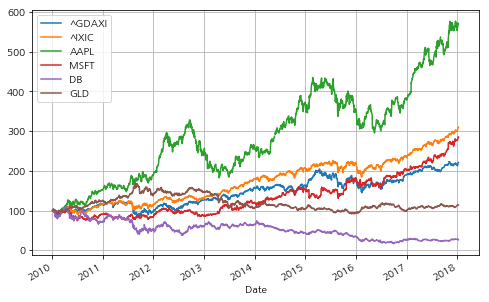

In [17]:
# 주가 데이터 불러오기
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import get_data_google
symbols = ['^GDAXI','^IXIC', 'AAPL', 'MSFT', 'DB', 'GLD']  # ^IXIC : 나스닥 지수
# data = pd.DataFrame()
# for sym in symbols:
#     try:      data[sym] = get_data_yahoo(sym, '2010-01-01')['Close']
#     except:
#         try:  data[sym] = get_data_yahoo(sym, '2010-01-01')['Close']
#         except: pass
# data.columns = symbols
data = pd.read_csv('./data/stocks2.csv')
data = data.set_index('Date')            # 전체 DataFrame의 index를 정의
data.index = pd.to_datetime(data.index)  # index의 포맷을 정의

# 시작가격을 (data.index[0]) 모두 100으로 고정할 때, 시간에 따른 가격변화
(data / data.iloc[0] * 100).plot(figsize=(8, 5), grid=True)  
data.info()

log (주간)수익률 평균  :
^GDAXI    0.158345
^IXIC     0.207333
AAPL      0.300229
MSFT      0.190171
DB       -0.253641
GLD       0.022283
dtype: float64

투자자산에 대한 공분산  :
          ^GDAXI     ^IXIC      AAPL      MSFT        DB       GLD
^GDAXI  0.063235  0.033789  0.027654  0.031026  0.084116 -0.002442
^IXIC   0.033789  0.045966  0.044801  0.042111  0.071832  0.000114
AAPL    0.027654  0.044801  0.105863  0.036598  0.055309  0.002629
MSFT    0.031026  0.042111  0.036598  0.081881  0.062233 -0.000664
DB      0.084116  0.071832  0.055309  0.062233  0.272843 -0.000473
GLD    -0.002442  0.000114  0.002629 -0.000664 -0.000473  0.043974


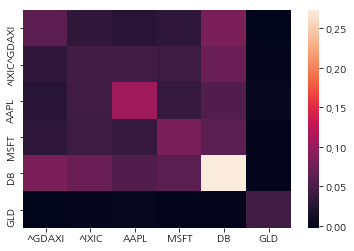

In [18]:
# 전체기간을 408로 나누어 주간 수익률 분석
rets = np.log(data / data.shift(1))
print('log (주간)수익률 평균  :\n{}\n\n투자자산에 대한 공분산  :\n{}'.format(
       rets.mean() * 408,   rets.cov() * 408))

import seaborn as sns
sns.heatmap(rets.cov() * 408); plt.show()

### <strong>02 기초이론
1. $ \mu_p $ (포트폴리오 <strong>전체 기대수익률</strong>) : $ \mu_p = E(\Sigma_i w_i r_i) = w^T \mu$
1. $ \sigma_p^2$ (포트폴리오 <strong>분산의 기댓값</strong>) : $ \sigma_p^2 = E((r-\mu)^2) $
1. $ \sqrt{\sigma_p^2} $ : 포트폴리오의 <strong>표준편차(변동성)</strong>
1. $ SR = \frac{\mu_p - r_f}{\sigma_p} $<strong>샤프지수(Sharp Ratio)</strong> : 포트폴리오 <strong>초과 수익 기댓값</strong> / 포트폴리오 <strong>표준편차 기댓값</strong>

In [19]:
# 기초이론 (The Basic Theory)
weights  = np.random.random(len(data.columns)) # 포트폴리오 종목별 비중값 : 총합이 1인, 6개의 난수를 생성
weights /= np.sum(weights)   
print('종목별 비중\t: {}\n기대수익률 \t: {:.5f}\n기댓값(분산)\t: {:.5f}\n표준편차(변동성)    : {:.5f}'.format(
      weights, 
      np.sum(rets.mean() * weights) * 408,
      np.dot(weights.T,  np.dot(rets.cov() * 408, weights)),
      np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 408, weights)))))

종목별 비중	: [ 0.02877822  0.02265145  0.23834451  0.08637583  0.45464201  0.16920798]
기대수익률 	: -0.01431
기댓값(분산)	: 0.08774
표준편차(변동성)    : 0.29621


Text(0,0.5,'기대 수익률(expected return)')

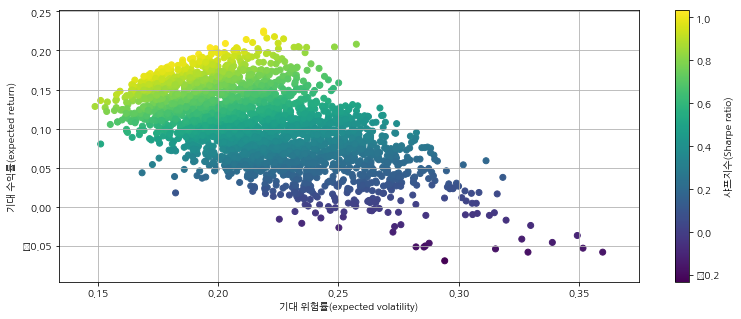

In [20]:
prets, pvols = [], []  
for p in range (2500):
    weights = np.random.random(len(data.columns))
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 408)  # 표준편차 (포트폴리오 수익) 계산
    pvols.append(np.sqrt(np.dot(weights.T,             # 몬테카를로 시뮬레이션 (수익 변동성) 
                 np.dot(rets.cov() * 408, 
                 weights))))  
prets, pvols = np.array(prets), np.array(pvols)

# 샤프지수를 시각화 : (무위험 단기 이자율에 대한 포트폴리오의 초과 수익률 기댓값) / 포트폴리오 표준편차 기댓값
# 투자자는 위험은 낮으면서 수익은 높은 상품을 찾고, 이를 '04. 효율적 투자선(efficient frontier)'라 부른다
plt.figure(figsize=(13, 5))
plt.scatter(pvols, prets, c=prets/pvols, marker='o'); plt.colorbar(label='샤프지수(Sharpe ratio)')  
plt.grid(True); plt.xlabel('기대 위험률(expected volatility)'); plt.ylabel('기대 수익률(expected return)')

### <strong>03 포트폴리오 <a href="https://datascienceschool.net/view-notebook/4642b9f187784444b8f3a8309c583007/">최적화</a>
Portfolio Optimizations <strong>(MSE등의 예측 오차값이 가장 작은 데이터 값을 찾는 알고리즘)</strong>
1. Log데이터 <strong>샤프지수 최대화</strong> 최적 분산비율
1. Log데이터 <strong>분산비율 초소화</strong> 최적 분산비율

In [21]:
# 제약조건
cons = ({'type':'eq',  'fun':lambda x: np.sum(x)-1})   # 제약조건 : 모든 비중의 합이 1이다
bnds = tuple((0,1) for x in range(len(data.columns)))  # 0~1 사이값으로, tuple 형태로 minimize 함수에 입력
len(data.columns) * [1. / len(data.columns), ]         # 초기값 리스트를 총합 1로 '균등배분'한다

# 포트폴리오의 통계 분석 출력
def statistics(weights):
    weights = np.array(weights)                 # weights : 포트폴리오 내 증권의 비율 (array) 0 ~ 1
    pret = np.sum(rets.mean() * weights) * 408  # pret    : 포트폴리오 기대값, 수익률 (float) 
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 408, weights))) # pvol : 기댓값 변동성 (float)
    return np.array([pret, pvol, pret / pvol])  # pret / pvol : 무위험 이자율 0일떄 샤프지수

In [22]:
# 조건1) 샤프지수를 최대화 (음수값을 최소로 한다)
def min_func_sharpe(weights):
    return -statistics(weights)[2]

import scipy.optimize as sco                        # sco.minimize() : 제약조건내 최적화 포트폴리오
opts = sco.minimize(min_func_sharpe,                                # return 최종 결과함수 
                    len(data.columns) * [1. / len(data.columns),],  # 균등배분
                    method = 'SLSQP',                               # 최적화 방식
                    bounds = bnds,                                  # input 데이터
                    constraints = cons)                             # 제약조건
print(opts)
print("""\n샤프지수 최대화 포트폴리오 분산 비율 : \n{}
      \n<<최적 포트폴리오 비중>>\n수익률 기댓값 : {}\n변동성 기댓값 : {}\n최적 샤프지수 : {}""".format(
    opts['x'].round(3),                 # 분산비율 (PortFolio 비중을 조절 결과값 : 'x' array([]) => (1, 6번의 비중을 높인다))
    statistics(opts['x']).round(3)[0],  # 수익률 기댓값
    statistics(opts['x']).round(3)[1],  # 변동성 기댓값
    statistics(opts['x']).round(3)[2])) # 최적 샤프지수

     fun: -1.0510744991718652
     jac: array([ -4.74125147e-04,  -3.88473272e-04,   7.63744116e-04,
         1.21533871e-04,   2.74319606e+00,  -2.32756138e-04])
 message: 'Optimization terminated successfully.'
    nfev: 66
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([  7.90782222e-02,   4.87102165e-01,   3.14915611e-01,
         3.46686096e-02,   4.05662883e-15,   8.42353924e-02])

샤프지수 최대화 포트폴리오 분산 비율 : 
[ 0.079  0.487  0.315  0.035  0.     0.084]
      
<<최적 포트폴리오 비중>>
수익률 기댓값 : 0.217
변동성 기댓값 : 0.206
최적 샤프지수 : 1.051


In [23]:
# 조건2) 포트폴리오 분산최소화 함수를
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

optv = sco.minimize(min_func_variance,   # 분산 최소 포트폴리오를 계산한다 
                    len(data.columns) * [1. / len(data.columns),],
                    method='SLSQP',
                    bounds=bnds, 
                    constraints=cons)
print(optv)
print("""\n분산을 최소로 하는 포트폴리오 분산 비율 : \n{}
      \n<<최적 포트폴리오 비중>>\n수익률 기댓값 : {}\n변동성 기댓값 : {}\n최적 샤프지수 : {}""".format(
    optv['x'].round(3),                 # 분산비율
    statistics(optv['x']).round(3)[0],  # 수익률 기댓값
    statistics(optv['x']).round(3)[1],  # 변동성 기댓값
    statistics(optv['x']).round(3)[2])) # 최적 샤프지수

     fun: 0.02112308745026193
     jac: array([ 0.04222143,  0.04215857,  0.04257481,  0.0419554 ,  0.07585195,
        0.04232877])
 message: 'Optimization terminated successfully.'
    nfev: 105
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([  1.78551980e-01,   2.73507087e-01,   7.74914953e-03,
         5.01609490e-02,   8.45677695e-18,   4.90030834e-01])

분산을 최소로 하는 포트폴리오 분산 비율 : 
[ 0.179  0.274  0.008  0.05   0.     0.49 ]
      
<<최적 포트폴리오 비중>>
수익률 기댓값 : 0.108
변동성 기댓값 : 0.145
최적 샤프지수 : 0.741


### <strong>04 효율적 투자선
<strong>고정된 최적화 초기조건</strong>을 반복하며 1)<strong>고정된 목표 수익률</strong>로 계산한 뒤, 2)<strong>종목의 비중을 조절</strong>하며 최적의 조건을 찾는다
1. 최적화 제약조건
    1. 목표수익률 : trets = np.linespace() 목표 수익률의 수준
    1. 포트폴리오 비중의 합은 1

Text(0,0.5,'expected return')

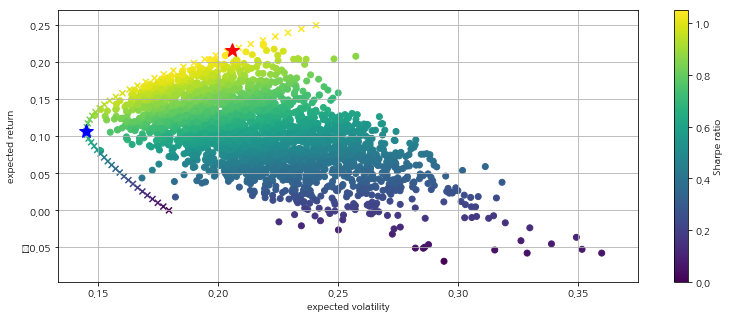

In [24]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

def min_func_port(weights):
    return statistics(weights)[1]

trets = np.linspace(0.0, 0.25, 50)  # 0. ~ 0.25 사이의 값들로 50개 생성
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, 
                       len(data.columns) * [1./len(data.columns),], 
                       method='SLSQP', bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

plt.figure(figsize=(13, 5))                                      # 주어진 수익률 수준에 대한 최소위험 포트폴리오
plt.scatter(pvols, prets, c = prets / pvols, marker='o')                             # 무작위 포트폴리오
plt.scatter(tvols, trets, c = trets / tvols, marker='x')                             # 효율적 투자선(최소 포트폴리오 보다 수익이 높은 점들)
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize=15.0)  # 빨간점 : 최대 샤프지수의 포트폴리오
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'b*', markersize=15.0)  # 파란점 : 최소 분산 포트폴리오
plt.grid(True); plt.colorbar(label='Sharpe ratio'); plt.xlabel('expected volatility'); plt.ylabel('expected return')

### <strong>05 자본시장선
<strong>위험이 없는 자산</strong>(국채)은 수익률이 미미하지만, <strong>투자자산을 '무위험자산'과 같이 고려</strong>하면 투자가능한 <strong>효율적 투자기회 집합</strong>은 크게 늘어난다
1. <strong>위험 자산으로 구성된 효율적 포트폴리오</strong>를 결정한 다음 <strong>무위험 자산을 추가</strong>한다
1. 무위험 자산의 비중을 조정하면, <strong>위험-수익률 집합</strong> 중 하나를 선택 가능하다
1. 최적의 투자조건 : <strong>무위험 자산의 위험-수익률</strong>을 지나면서, <strong>효율적 투자선</strong>에 접하는 접선의 포트폴리오

#### <strong>1) Inter-polation (보간법)
거친 직선 데이터를 부드러운 곡선으로 변환(spline 사이의 값들을 추정)

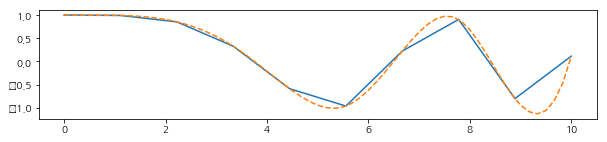

In [25]:
# 1. 10개 구간으로 나뉜 spline 을 구현
import numpy as np 
x_org = np.linspace(0, 10, num=10, endpoint=True)
y_org = np.cos(-x_org **2 / 9.0)

# 2. 보간법으로 smooth하게 변경한 좌표값
from scipy.interpolate import interp1d
f2 = interp1d(x_org, y_org, kind='cubic')
xnew = np.linspace(0, 10, num=61, endpoint=True) # num = 61 (총 61개의 점으로 곡선에 반영)

plt.figure(figsize=(10,2))
plt.plot(x_org, y_org)           # Spline 
plt.plot(xnew, f2(xnew), '--')   # 61 구간으로 보완한 보간법 Spline

#### <strong>2) 최적의 Portfolio 찾기
위험-수익률 공간에서, (0,무위험 이자율) 을 지나면서 효율적 투자선의 접선에 포함된 포트폴리오를 찾는다

In [27]:
# 위험 수익률 공간을 추출
ind   = np.argmin(tvols)  # 03.포트폴리오 최적화의 tvols 중 최저점 포트폴리오 index 값 추출
evols = tvols[ind:]       # ind(최저점) 뒤의 "위험-수익률 공간"을 추출 (vol:수익률) - ndarray(29,)
erets = trets[ind:]       # ind(최저점) 뒤의 "위험-수익률 공간"을 추출 (ret:분산)  - ndarray(29,)

# 큐빅 스플라인 보간법을 활용 (관측점 사이의 보간함수를 활용) : 중간점 추출을 위해 뒤에서 3개는 버린다
import scipy.interpolate as sci
tck = sci.splrep(evols[:-3], erets[:-3])

def f(x):  return sci.splev(x, tck, der=0)  # 연속미분함수 (der=0)
def df(x): return sci.splev(x, tck, der=1)  # 1차 미분 도함수 (der=1)

# sco.fsolve(사용자 함수로 정의한 연립방정식, [개별 초기값]) : 연립방정식을 풀이한다
def equations(p, rf = 0.01):  # (최적의 포트폴리오) 개별 수식을 순차적으로 연산
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3
opt = sco.fsolve(equations, [0.01, 0.5, 0.15]) # 연립 방정식의 초기값 : [0.01, 0.5, 0.15]

print('연립방정식 (eqiations) 풀이 : {}\n풀이 결과를 재 대입결과\t : {}'.format(
    opt,
    np.round(equations(opt),6) ))              # 재 대입결과 0으로 수렴한다

연립방정식 (eqiations) 풀이 : [ 0.01        1.00372444  0.21687702]
풀이 결과를 재 대입결과	 : [ 0. -0. -0.]


Text(0,0.5,'expected return')

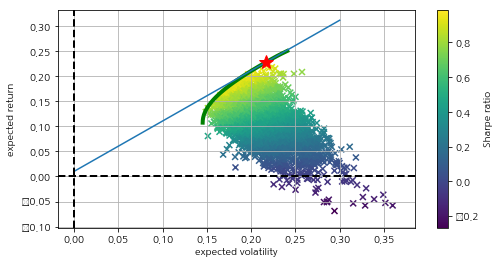

In [28]:
# Visualization
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=(prets-0.01)/pvols, marker='x') # 위험-수익률 공간의 '사프지수'를 표현 
plt.plot(evols, erets, 'g', lw=4.0)                         # 효율적 투자선

cx = np.linspace(0.0, 0.3)                                  # 0. ~ .3 : 확인을 요하는 구간          
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)                  # 자본시장선
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0)          # 무위험 자산(0.01)을 지나면서 효율적 투자선에 접하는 점
plt.grid(True)                            ; plt.colorbar(label='Sharpe ratio')
plt.axhline(0, color='k', ls='--', lw=2.0); plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')         ; plt.ylabel('expected return')

In [29]:
# 위에서 예측한 최적 포트폴리오 비중을 출력
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, len(data.columns) * [1./len(data.columns), ], method='SLSQP',
                   bounds = bnds, constraints = cons)
res['x'].round(3)

array([ 0.069,  0.507,  0.346,  0.035,  0.   ,  0.042])